In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split


sns.set(style='ticks', context='notebook', palette='Set2')

## Loading and Visualising Data

In [115]:
df = pd.read_csv("iris.data", names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])

In [116]:
df.shape

(150, 5)

In [117]:
df.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [118]:
# Counting number of flowers of each type
df.groupby('Class').size()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### Box Plots
* The bar contains values from 25 to 75 percentiles of the data.
* The Lines coming out are called whiskers.
* The whiskers are the fences that contain the inlier data.
* The Line in the middle of the box denotes the median.
* The outliers are the data outside the fences.

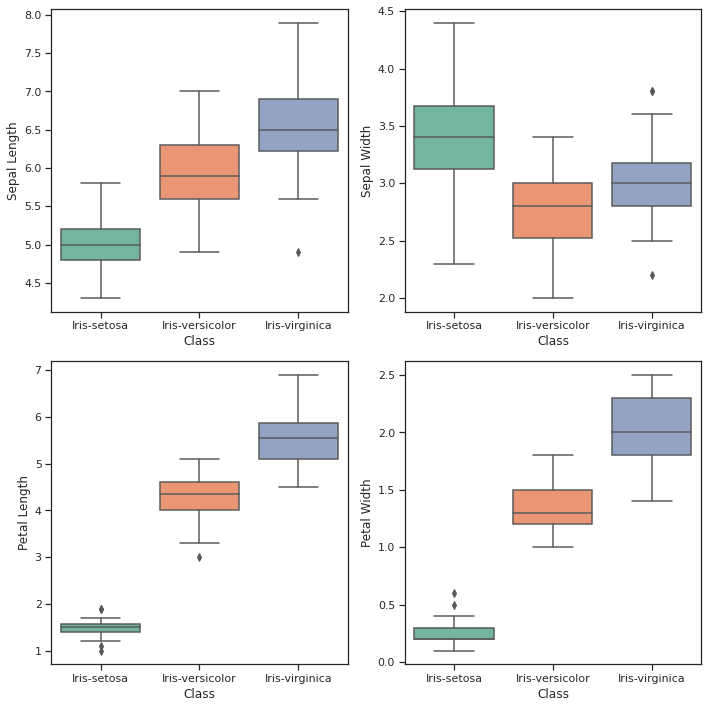

In [119]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(x='Class', y='Sepal Length', data=df, ax=ax[0,0])
sns.boxplot(x='Class', y='Sepal Width', data=df, ax=ax[0,1])
sns.boxplot(x='Class', y='Petal Length', data=df, ax=ax[1,0])
sns.boxplot(x='Class', y='Petal Width', data=df, ax=ax[1,1])
fig.tight_layout()

#### Violin Plots
Denser regions means indicate a higher concentration of the data.

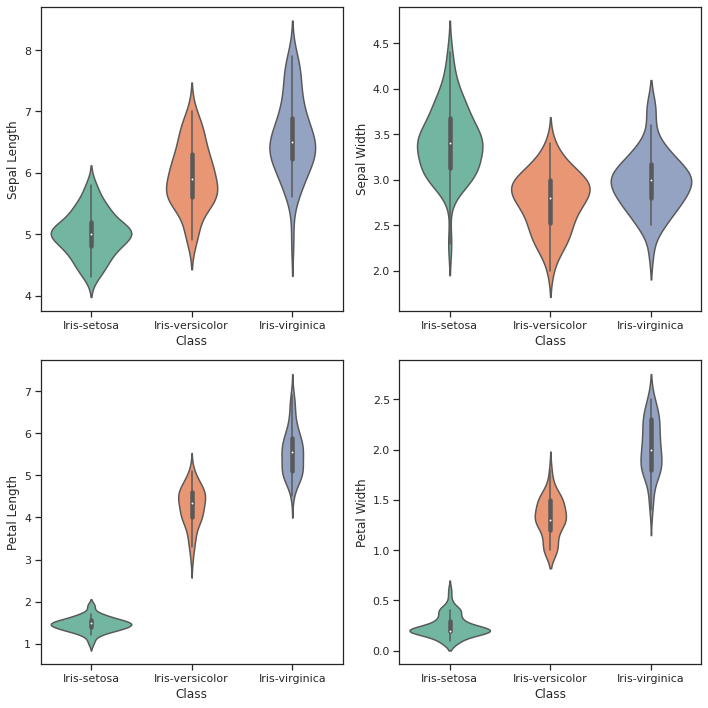

In [120]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.violinplot(x='Class', y='Sepal Length', data=df, ax=ax[0,0])
sns.violinplot(x='Class', y='Sepal Width', data=df, ax=ax[0,1])
sns.violinplot(x='Class', y='Petal Length', data=df, ax=ax[1,0])
sns.violinplot(x='Class', y='Petal Width', data=df, ax=ax[1,1])
fig.tight_layout()

#### Pair Plots
* Diagonal entries are Kernel density graphs.
* Non Diagonal entries are scatter plots which show relationship of different species with pairs of characteristics.
* Graphs in lower and upper triangle are the same with axes flipped.

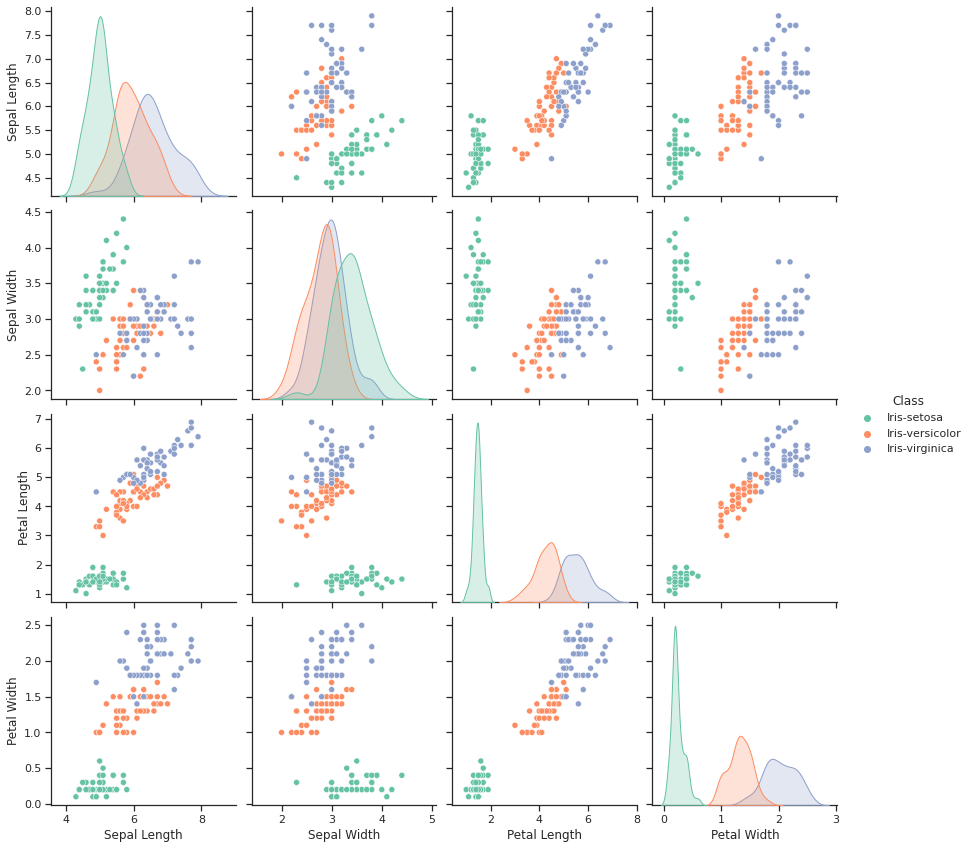

In [121]:
sns.pairplot(df, hue='Class', palette='Set2', height=3)

#### Heatmap
Heatmap will allow us to see correlations between characteristics.

<AxesSubplot:>

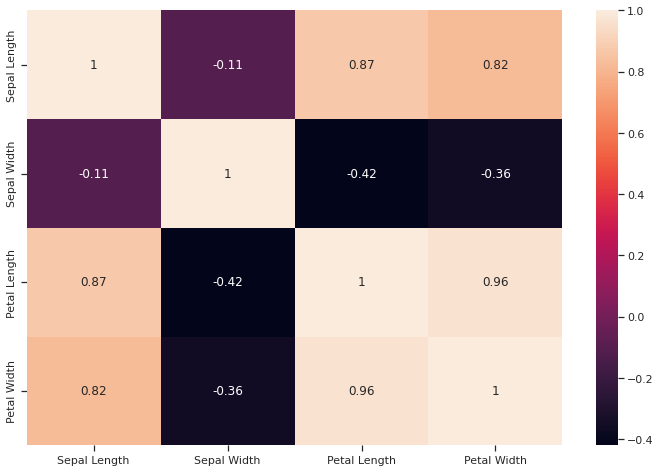

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

# Training Model using logistic regression

In [123]:
# Splitting the data into training and test set
def split_data(data = df, test = 0.3):
    train, test  =  train_test_split(df, test_size = test)

    train_x = train[['Sepal Length', 'Sepal Width', 'Petal Length',
                    'Petal Width']].values.T
    train_y = np.array([train.Class.values.T])

    test_x = test[['Sepal Length', 'Sepal Width', 'Petal Length',
                 'Petal Width']].values.T
    test_y = np.array([test.Class.values.T])

    return train_x, train_y, test_x, test_y

In [156]:
# Forward and backward propagation
def propogate(w, b, X, Y):
    m = X.shape[1]
    A = w.T @ X + b # Using linear activation function
    J = np.sum((A-Y)**2)/m  # MSE cost function
    dw = np.sum(X@((A-Y).T))*2/m # Gradient of cost function wrt w
    db = np.sum(A-Y)*2/m  # Gradient of cost function wrt b
    grads = {"dw" : dw, "db" : db}
    return grads, J

In [157]:
# Function for running gradient descent for a given number of iterations
def optimize(w, b, X, Y, iterations, learning_rate):
    costs = [] # Keep track of cost
    dw, db = 0, 0 
    for i in range(iterations): 
        grads, cost = propogate(w, b, X, Y)
        w = w - learning_rate*grads["dw"] 
        b = b - learning_rate*grads["db"] 
        dw = grads["dw"]
        db = grads["db"]
        costs.append(cost)
    
    params = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    return params, grads, costs

In [159]:
def predict(w, b, X):
    m = X.shape[1]
    Y_predictions = np.zeros((1,m))
    A = w.T @ X + b
    Y_predictions = np.round(A) # Rounding off to the nearest integer
    assert(Y_predictions.shape == (1,m))
    return Y_predictions

In [160]:
# Combining all the function to make the final model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.001):
    w, b = np.zeros((X_train.shape[0],1)), 0
    param, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = param["w"]
    b = param["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    test_accuracy = 100*np.mean((Y_prediction_test == Y_test).astype(float))
    train_accuracy = 100*np.mean((Y_prediction_train == Y_train).astype(float))
    print(f"train accuracy: {train_accuracy}")
    print(f"test accuracy: {test_accuracy}")
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

#### Using all the features

train accuracy: 83.80952380952381
test accuracy: 86.66666666666667


Text(0.5, 0, 'iterations')

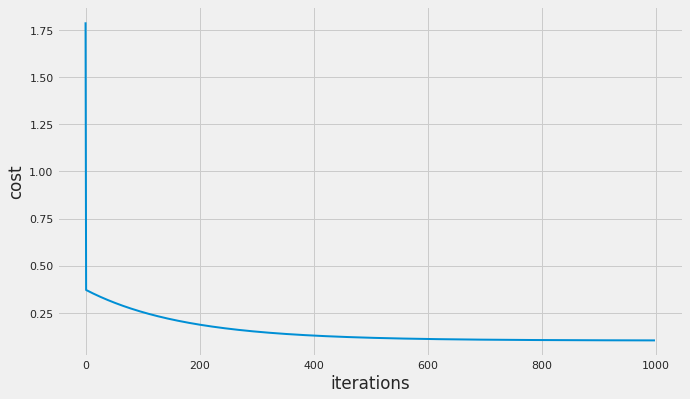

In [272]:
w = np.zeros((4,1))
b = 0
assert(w.shape==(4, 1))
train_x, train_y, test_x, test_y = split_data(df, 0.3)
"""
Iris-setosa = 0
Iris-versicolor = 1
Iris-virginica = 2
"""
train_y[train_y=="Iris-setosa"] = 0 
train_y[train_y=="Iris-versicolor"] = 1
train_y[train_y=="Iris-virginica"] = 2
test_y[test_y=="Iris-setosa"] = 0
test_y[test_y=="Iris-versicolor"] = 1
test_y[test_y=="Iris-virginica"] = 2

d = model(train_x, train_y, test_x, test_y, num_iterations = 10000, learning_rate = 0.003)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,6))
plt.plot(d["costs"], lw=2)
plt.ylabel("cost")
plt.xlabel("iterations")


# Training the model using sklearn

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [131]:
train, test  =  train_test_split(df, test_size=0.3) # 70% of our data will be used for training the model

train_x = train[['Sepal Length', 'Sepal Width', 'Petal Length',
                 'Petal Width']] # Taking out the relevant data, which will be used as input,  out of the train dataset
train_y = train.Class # The output of the model should be the class of flower. So train_y contains all the class corresponding to the data in train_X

test_x = test[['Sepal Length', 'Sepal Width', 'Petal Length',
                 'Petal Width']] 
test_y = test.Class

#### Using Logistic Regression

In [132]:
model = LogisticRegression()
model.fit(train_x, train_y) # Training the data, train_x is the input and train_y is the output

LogisticRegression()

In [133]:
# Pricting the results
predicted = model.predict(test_x)
accuracy = metrics.accuracy_score(predicted, test_y)
accuracy

0.9333333333333333